# Finansta Fraud Örneği
29 Şubat 2020 - Yunus Emre Gündoğmuş & Hasan Kemik & Feyza Zeynep Salam

Bugün sizlerle beraber Bankacılıkta Fraud çalışması gerçekleştireceğiz. Fraud Fin-tech ve Bankacılık sektöründe oldukça popüler bir konu ve çözümü de çok zor.  Bu çalışmada kullanacağımız veriseti Avustralya'da bir bankanın kredi kartı başvuruları ile ilgili, Gizlilik yüzünden bütün değişkenlerin isimleri ve içeriği değiştirilmiş. 


Kullanacağımız Veriseti: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

        
        
### Yararlandığım Kaynaklar
- https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
- https://github.com/wildanalaziz/AustralianCredit
- http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

In [32]:
# Ön İşleme
import pandas as pd
import numpy as np

# Modelleme
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder

# Görselleştirme
import matplotlib.pyplot as plt
from dabl import plot

# Arayüz
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Uyarıları engellemek için
import warnings
warnings.filterwarnings("ignore")

random_state = 2020

In [2]:
data = pd.read_csv('australian.csv', sep=" ", header=None)
data.columns = ["Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8","Var9","Var10","Var11","Var12","Var13","Var14","Target"]
data

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


# Görselleştirme

D:\Anaconda\lib\site-packages\dabl\plot\supervised.py:528: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
D:\Anaconda\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 2 outliers in column Var10.
  int(dropped), series.name), UserWarning)
D:\Anaconda\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 5 outliers in column Var14.
  int(dropped), series.name), UserWarning)
D:\Anaconda\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 2 outliers in column Var13.
  int(dropped), series.name), UserWarning)


Target looks like classification
Linear Discriminant Analysis training set score: 0.721


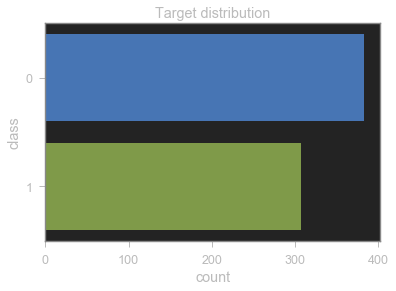

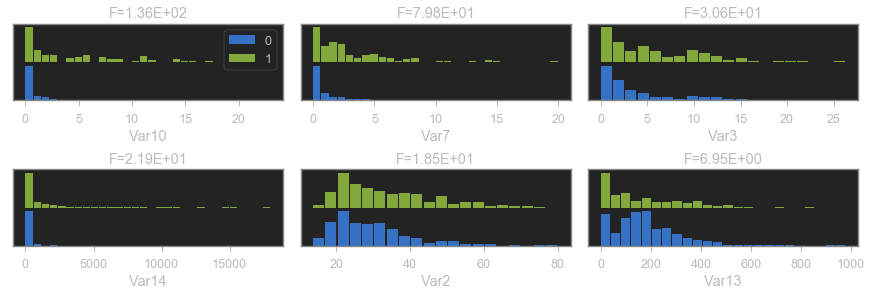

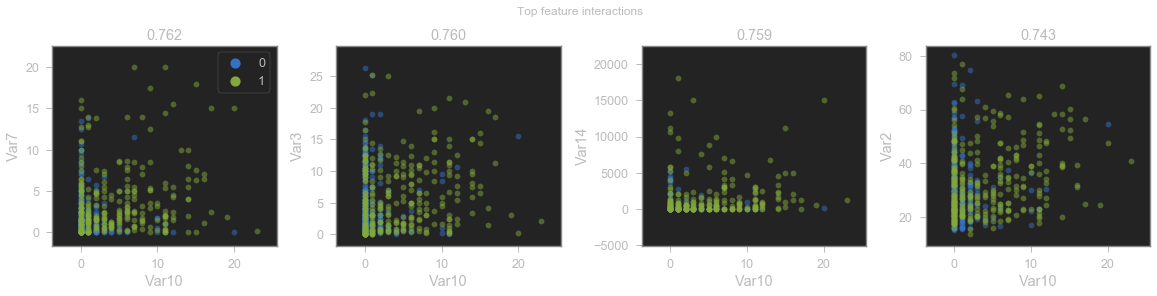

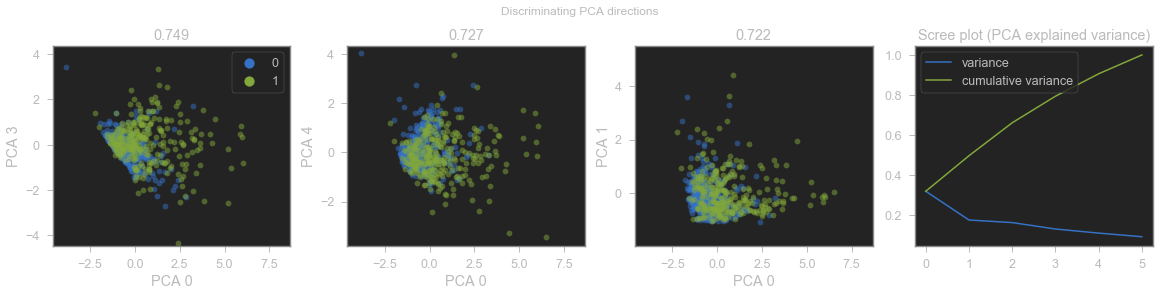

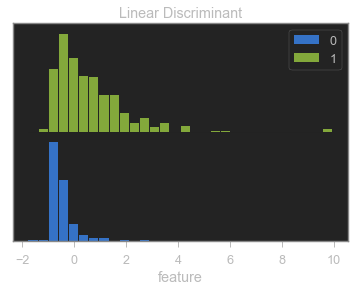

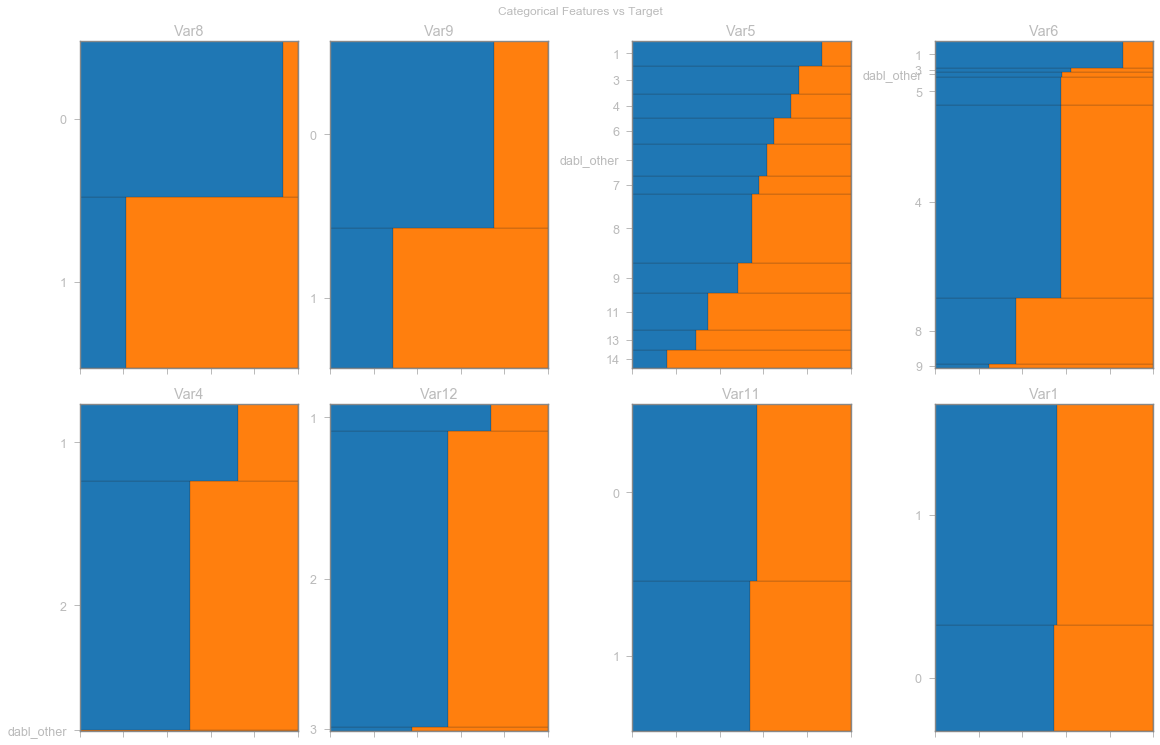

In [3]:
plot(data, 'Target')
plt.show()

In [4]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Target
Var1,1,0.0366593,-0.0281663,-0.0635282,-0.00532134,0.0526577,0.0970094,0.000918225,-0.0632558,-0.00842734,0.0539843,-0.0599007,0.0585954,0.00361564,-0.0138971
Var2,0.0366593,1,0.201315,0.0895032,-0.0938769,0.0285101,0.392788,0.204342,0.0836798,0.185574,0.0547791,0.0207025,-0.0771589,0.0185387,0.161626
Var3,-0.0281663,0.201315,1,0.091526,0.0276649,0.0945042,0.298902,0.244317,0.174846,0.271207,-0.0130234,0.0937517,-0.222346,0.123121,0.206294
Var4,-0.0635282,0.0895032,0.091526,1,0.0888461,0.046639,0.0806243,0.129863,0.162464,0.106457,0.0049637,0.00639996,-0.00175772,0.120065,0.194306
Var5,-0.00532134,-0.0938769,0.0276649,0.0888461,1,0.402284,0.144757,0.311833,0.222957,0.150166,0.0247381,0.0702221,0.0881397,0.0307353,0.373712
Var6,0.0526577,0.0285101,0.0945042,0.046639,0.402284,1,0.2404,0.246193,0.0803969,0.0988407,0.0936411,0.0364348,0.0706618,0.0648408,0.246567
Var7,0.0970094,0.392788,0.298902,0.0806243,0.144757,0.2404,1,0.345689,0.222982,0.32233,0.138139,-0.0162965,-0.0763885,0.0513449,0.322475
Var8,0.000918225,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1,0.432032,0.379532,0.0912758,0.0450535,-0.0673868,0.0900119,0.720407
Var9,-0.0632558,0.0836798,0.174846,0.162464,0.222957,0.0803969,0.222982,0.432032,1,0.571498,0.0170428,0.176097,-0.0533207,0.0776518,0.458301
Var10,-0.00842734,0.185574,0.271207,0.106457,0.150166,0.0988407,0.32233,0.379532,0.571498,1,0.00694376,0.101479,-0.119808,0.0636924,0.40641


# Ön İşleme

### Kategorik Değişkenlerin Dummy Değerlerinin Çıkartılması

In [5]:
y = data.pop('Target')
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=random_state)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(517, 14) (517,)
(173, 14) (173,)


In [25]:
kfold=KFold(n_splits=10,random_state=random_state)
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=random_state)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier(random_state=random_state))) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=random_state)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=random_state)))
models.append(('BaggingClassifier', BaggingClassifier(random_state=random_state)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=random_state)))

sonuclar = []
for isim, model in models:
    cross_val_sc=cross_val_score(model, X_train, y_train, cv=kfold)
    sonuclar.append((isim,cross_val_sc.mean()))

sonuc_tablo=pd.DataFrame(sonuclar, columns=["Model","Skorlar"]).sort_values('Skorlar',ascending=False)
sonuc_tablo

,Model,Skorlar
8,RandomForestClassifier,0.870626
5,LDA,0.868627
7,BaggingClassifier,0.864593
6,AdaBoostClassifier,0.862934
0,Logistic Regression,0.833861
2,Decision Tree (CART),0.795098
1,Naive Bayes,0.791327
3,K-NN,0.692534
4,SVM,0.634427


# Parametre Optimizasyonu

In [22]:
parameter={
    'max_depth': [2,3,5,7,10,None],
    'min_samples_leaf': [1,10,30,60],
    'max_features': [1.0,'log2','sqrt','auto',None],
    'n_estimators': [1,2,3,5,10,20,40,50,100,]
    }
grid=GridSearchCV(RandomForestClassifier(), parameter,n_jobs=-1, verbose=1)
gridfit=grid.fit(X_train,y_train)
gridfit.best_params_

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 3021 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:   56.5s finished


{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 5}

In [23]:
rf = RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print("Train için Doğruluk Skoru:",accuracy_score(y_train,y_pred_train))
print("Test için Doğruluk Skoru:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Train için Doğruluk Skoru: 0.8936170212765957
Test için Doğruluk Skoru: 0.8497109826589595
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        96
           1       0.79      0.91      0.84        77

    accuracy                           0.85       173
   macro avg       0.85      0.86      0.85       173
weighted avg       0.86      0.85      0.85       173

